# Piecewise Regression

Piecewise regression involves separating the independant variable into different segments and running a regression on each segment.

## Step functions

The simplest piecewise regression is the step function which fits a linear regression to each step or bin. Here we implement 5 bins:

In [65]:
# to make this notebook's output stable across runs
import numpy as np
np.random.seed(42)

In [50]:
X = 2 * np.random.rand(100,1)
y = 4 + 4 * X + 2 * X**2 + np.random.randn(100,1)

data = np.hstack((X,y))
temp = data[np.argsort(data[:,0])]
X = temp[:,0]
y = temp[:,1]

In [55]:
pred1 = np.ones((20,1))*y[:20].mean(0)
pred2 = np.ones((20,1))*y[20:40].mean(0)
pred3 = np.ones((20,1))*y[40:60].mean(0)
pred4 = np.ones((20,1))*y[60:80].mean(0)
pred5 = np.ones((20,1))*y[80:].mean(0)

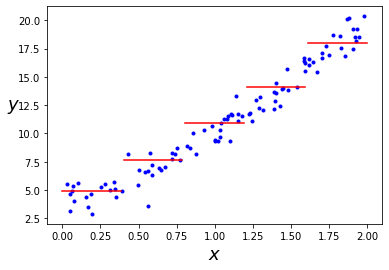

In [64]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

x_plot = np.linspace(0,2,100)
plt.plot(X, y, "b.")

plt.plot(x_plot[:20], pred1, "r")
plt.plot(x_plot[20:40], pred2, "r")
plt.plot(x_plot[40:60], pred3, "r")
plt.plot(x_plot[60:80], pred4, "r")
plt.plot(x_plot[80:], pred5, "r")

plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

## Polynomial Piecewise Regression and Regression Splines

We can improve this model by instead fitting a polynomial regression in each bin. Below we implemement a simple linear regression:

In [67]:
x_plot = np.linspace(0,2,100)

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(X[:20].reshape((-1,1)),y[:20].reshape((-1,1)))
pred1 = lin_reg.predict(x_plot[:20].reshape((-1,1)))

lin_reg.fit(X[20:40].reshape((-1,1)),y[20:40].reshape((-1,1)))
pred2 = lin_reg.predict(x_plot[20:40].reshape((-1,1)))

lin_reg.fit(X[40:60].reshape((-1,1)),y[40:60].reshape((-1,1)))
pred3 = lin_reg.predict(x_plot[40:60].reshape((-1,1)))

lin_reg.fit(X[60:80].reshape((-1,1)),y[60:80].reshape((-1,1)))
pred4 = lin_reg.predict(x_plot[60:80].reshape((-1,1)))

lin_reg.fit(X[80:].reshape((-1,1)),y[80:].reshape((-1,1)))
pred5 = lin_reg.predict(x_plot[80:].reshape((-1,1)))

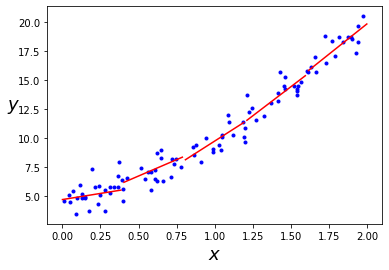

In [68]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")

plt.plot(x_plot[:20], pred1, "r")
plt.plot(x_plot[20:40], pred2, "r")
plt.plot(x_plot[40:60], pred3, "r")
plt.plot(x_plot[60:80], pred4, "r")
plt.plot(x_plot[80:], pred5, "r")

plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

## Constraints and Natural Cubic Splines

To demonstrate constraints we will implement cubic piecewise regression on new data:

In [79]:
X = 2 * np.random.rand(30,1)
y = np.random.randn(30,1)
X_add = np.linspace(2,4,30).reshape(-1,1)
y_add = 2+np.random.randn(30,1)


X = np.vstack((X, X_add))
y = np.vstack((y, y_add))

In [294]:
x_plot = np.linspace(0,4,60)
transformed_x_plot = np.vstack((x_plot, x_plot**2, x_plot**3)).T
transformed_X = np.hstack((X, X**2, X**3))

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(transformed_X[:15],y[:15].reshape((-1,1)))
pred1 = lin_reg.predict(transformed_x_plot[:15])

lin_reg.fit(transformed_X[15:30],y[15:30].reshape((-1,1)))
pred2 = lin_reg.predict(transformed_x_plot[15:30])

lin_reg.fit(transformed_X[30:45],y[30:45].reshape((-1,1)))
pred3 = lin_reg.predict(transformed_x_plot[30:45])

lin_reg.fit(transformed_X[45:],y[45:].reshape((-1,1)))
pred4 = lin_reg.predict(transformed_x_plot[45:])

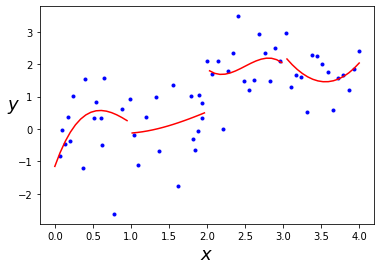

In [295]:
plt.plot(X, y, "b.")

plt.plot(x_plot[:15], pred1, "r")
plt.plot(x_plot[15:30], pred2, "r")
plt.plot(x_plot[30:45], pred3, "r")
plt.plot(x_plot[45:], pred4, "r")


plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

As we can see our regression is discontinuous. We can constrain our regression by setting the value of the endpoints equal, the first derivatives equal, the second derivatives equal etc. The simplest way to do this is to create a cubic polynomial but with a truncated power basis (ie add a new cubic to each spline) which takes the form:

$$ h(x, \xi)=(x-\xi)^3_+=\begin{cases} (x-\xi)^3 &\text{ if } x > \xi \\ 0 &\text{ otherwise}, \end{cases}$$

So our model then becomes:

$$y = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 + \theta_4 h(x, \xi_1) + \theta_5 h(x, \xi_2)...$$

We can think of this as compounding the cubics. The first spline contains the original cubic. The second one contains the original plus $(x-\xi_1)^3$. The third one contains the orginal cubic plus $(x-\xi_1)^3$ plus $(x-\xi_2)^3$. This repeats for all the splines and generates a smooth curve.

In [70]:
x_plot = np.linspace(0,4,60)

def h(x, xi):
    temp = (x-xi)**3
    temp[x < xi] = 0
    return temp

transformed_x_plot = np.vstack((x_plot, x_plot**2, x_plot**3, h(x_plot,1), h(x_plot,2), h(x_plot,3))).T
transformed_X = np.hstack((X, X**2, X**3, h(X,1), h(X,2), h(X,3)))

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(transformed_X,y.reshape((-1,1)))
y_pred = lin_reg.predict(transformed_x_plot)

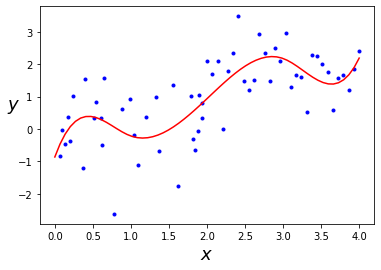

In [303]:
plt.plot(X, y, "b.")

plt.plot(x_plot, y_pred, "r")

plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

The above image is a natural cubic spline as it uses piecewise cubics.

## Smoothing Splines

The concept behind smoothing splines is we want a continuous function that goes through the data but that it should be as smooth as possible so that it isn't noisy and perfectly interpolates the original data. This "noisiness" can be thought of the sum of the curvature in all points which equates to the integral of the second derivative of the function. In other words we want to minimise:

$$ \text{RSS}+\lambda \int^b_a f''(t)dt$$

Here lambda is the tuning parameter. It can be shown that the best function for this is a piecewise cubic polynomial with knots at each data point. This means the predictions will be of the form:

$$\hat{y}=\theta_0 + \theta_1 h(x, \xi_1) + \theta_2 h(x, \xi_2)... = \theta_0 + \theta_1  (x-\xi_1)^3 + \theta_2  (x-\xi_2)^3...$$

To calculate the above thetas we can first write the curvature penalty using linear algebra which gives us:

$$ \lambda \theta^T \Omega \theta$$

Where 

$$\Omega_{ij} = \int^b_a h''(t, \xi_i) h''(t, \xi_j)dt = \int^b_a (t-\xi_i)(t-\xi_j)dt$$

Additionally we define a basis matrix $G$ as:

$$G_{ij} = h(x_i, \xi_j)$$

And combining the above in a closed solution to get the optimal thetas becomes:

$$\theta = (G^T G+\lambda \Omega)^{-1}G^T y $$

Let's implement this below:

In [124]:
#create G
G = []
for i in range(len(X)):
    row = []
    for j in range(len(X)):
        row.append(h(X[i],X[j])[0])
    G.append(row)
G = np.array(G)

In [126]:
import scipy.integrate as integrate

#create omega
omega = []
for i in range(len(X)):
    row = []
    for j in range(len(X)):
        val = integrate.quad(lambda t: (t-i)*(t-j), 0, 4.5)
        row.append(val[0])
    omega.append(row)

omega = np.array(omega)

In [119]:
#create predicitons from G and omega
def create_pred(lambda_exponent):
    lambd = 10 ** lambda_exponent
    thetas = np.linalg.inv((G.T.dot(G)+lambd*omega)).dot(G.T).dot(y)
    
    pred = []
    for i in x_plot:
        temp = 0
        for j in range(len(thetas)):
            temp += thetas[j] * h(i, X[j])
        pred.append(temp[0])
    return pred

In [120]:
pred1 = create_pred(1)
pred2 = create_pred(5)
pred3 = create_pred(10)
pred4 = create_pred(15)

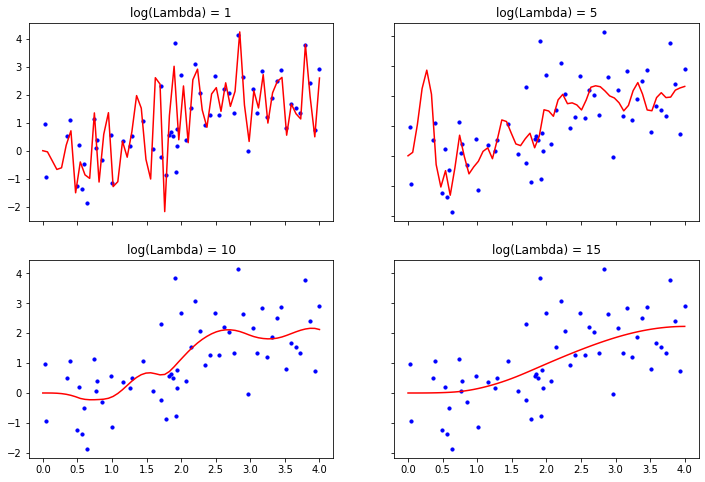

In [127]:
fig, axs = plt.subplots(2, 2, figsize=(12,8))
axs[0, 0].scatter(X, y, color = "b", s=10)
axs[0, 0].plot(x_plot, pred1, color = "r")
axs[0, 0].set_title('log(Lambda) = 1')
axs[0, 1].scatter(X, y, color = "b",s=10)
axs[0, 1].plot(x_plot, pred2, color = "r")
axs[0, 1].set_title('log(Lambda) = 5')
axs[1, 0].scatter(X, y, color = "b",s=10)
axs[1, 0].plot(x_plot, pred3, color = "r")
axs[1, 0].set_title('log(Lambda) = 10')
axs[1, 1].scatter(X, y, color = "b",s=10)
axs[1, 1].plot(x_plot, pred4, color = "r")
axs[1, 1].set_title('log(Lambda) = 15')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()